In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.io as pio 
import plotly.colors as colors


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

plt.rc("figure", figsize=(22, 8))

pd.set_option('display.max_rows', 100) 

In [162]:
list_company = ['Audi', 'BMW', 'Honda', 'NIO', 'Nissan', 'Rolls Royces', 'Tata', 'Tesla', 'Volkswagen']
le = LabelEncoder()

list_company_le = le.fit_transform(list_company)
list_company_le

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [163]:
for i, company in enumerate(range(0, len(list_company_le), 1)):
    print(i, ":", le.inverse_transform([company]))

0 : ['Audi']
1 : ['BMW']
2 : ['Honda']
3 : ['NIO']
4 : ['Nissan']
5 : ['Rolls Royces']
6 : ['Tata']
7 : ['Tesla']
8 : ['Volkswagen']


In [164]:
num =3  #Tesla
company = le.inverse_transform([num])[0]
company

'NIO'

In [165]:
path = f'./Data/{company}/{company.lower()}.csv'
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,6.00,6.93,5.35,6.60,6.60,66849000
1,2018-09-13,6.62,12.69,6.52,11.60,11.60,158346500
2,2018-09-14,12.66,13.80,9.22,9.90,9.90,172473600
3,2018-09-17,9.61,9.75,8.50,8.50,8.50,56323900
4,2018-09-18,8.73,9.10,7.67,7.68,7.68,41827600


In [166]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,17.211280,17.789259,16.571456,17.211469,17.211469,6.884111e+07
std,18.260991,18.807038,17.601334,18.238566,18.238566,7.170406e+07
min,1.190000,1.450000,1.190000,1.320000,1.320000,5.111000e+06
25%,3.475000,3.580000,3.342500,3.460000,3.460000,2.251690e+07
50%,6.875000,7.150000,6.655000,6.880000,6.880000,4.951245e+07
75%,36.100001,37.420001,34.545001,36.085000,36.085000,8.283448e+07
max,64.949997,66.989998,62.189999,62.840000,62.840000,5.771851e+08


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       742 non-null    object 
 1   Open       742 non-null    float64
 2   High       742 non-null    float64
 3   Low        742 non-null    float64
 4   Close      742 non-null    float64
 5   Adj Close  742 non-null    float64
 6   Volume     742 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.7+ KB


In [168]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [169]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-12,6.000000,6.930000,5.350000,6.600000,6.600000,66849000
2018-09-13,6.620000,12.690000,6.520000,11.600000,11.600000,158346500
2018-09-14,12.660000,13.800000,9.220000,9.900000,9.900000,172473600
2018-09-17,9.610000,9.750000,8.500000,8.500000,8.500000,56323900
2018-09-18,8.730000,9.100000,7.670000,7.680000,7.680000,41827600
...,...,...,...,...,...,...
2021-08-17,37.459999,39.020000,36.830002,38.099998,38.099998,60838000
2021-08-18,38.490002,39.630001,37.950001,38.860001,38.860001,48277600
2021-08-19,37.889999,38.150002,36.240002,36.290001,36.290001,56718000


## Feature Engineering


In [170]:
# 1. Daily Return
data['Daily_Return'] = (data['Close'] - data['Open']) / data['Open'] * 100

# 2. High-Low Spread (Volatility)
data['High_Low_Spread'] = (data['High'] - data['Low']) / data['Low'] * 100

In [171]:
# Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
data['MA50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average

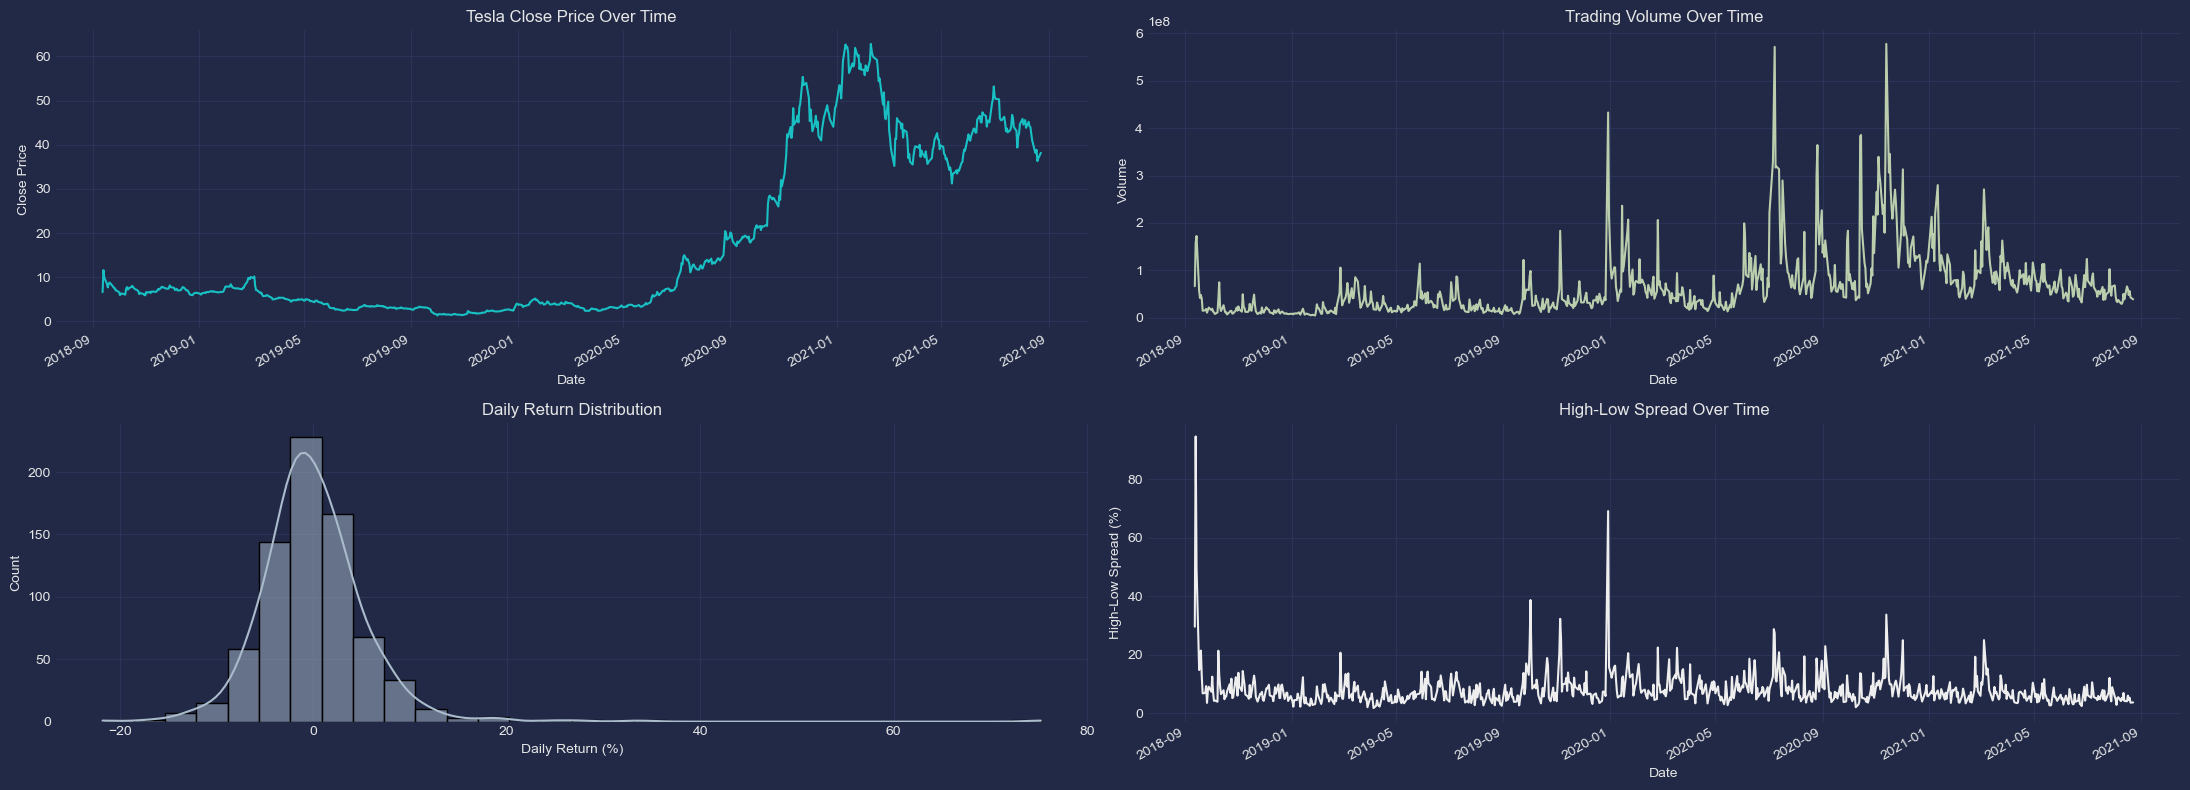

In [172]:
# Time Series Analysis: Close Price
plt.subplot(2, 2, 1)
data['Close'].plot(title='Tesla Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Volume Over Time
plt.subplot(2, 2, 2)
data['Volume'].plot(title='Trading Volume Over Time', color='#bacead')
plt.xlabel('Date')
plt.ylabel('Volume')

# Distribution Analysis: Daily Return
plt.subplot(2, 2, 3)
sns.histplot(data['Daily_Return'], kde=True, bins=30, color='#abce')
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return (%)')

# Volatility Analysis: High-Low Spread
plt.subplot(2, 2, 4)
data['High_Low_Spread'].plot(title='High-Low Spread Over Time', color='#eee')
plt.xlabel('Date')
plt.ylabel('High-Low Spread (%)')

plt.tight_layout()
plt.show()

1. **Tesla Close Price Over Time**:

   - The chart shows Tesla's `Close` price from 2016 to 2021, with a significant upward trend starting around 2020, indicating strong growth linked to increased interest in Tesla and the electric vehicle industry. Prior to this, the stock price remained relatively stable from 2016 to late 2019.

2. **Trading Volume Over Time**:

   - Trading volume experienced spikes, especially around 2020, corresponding with the stock price increase. These spikes suggest heightened trading activity due to news or major announcements and can reflect strong investor interest affecting the stock's direction.

3. **Daily Return Distribution**:

   - The `Daily Return` histogram resembles a normal distribution, with most returns close to 0%. This indicates that daily returns are typically small, although there are occasional days with significant positive or negative returns, reflecting volatility.

4. **High-Low Spread Over Time**:
   - The high-low spread indicates daily price volatility, showing how much the stock's price fluctuated each day. Spikes in this metric often coincide with increased trading volume and rising stock prices, suggesting times of significant market reactions.


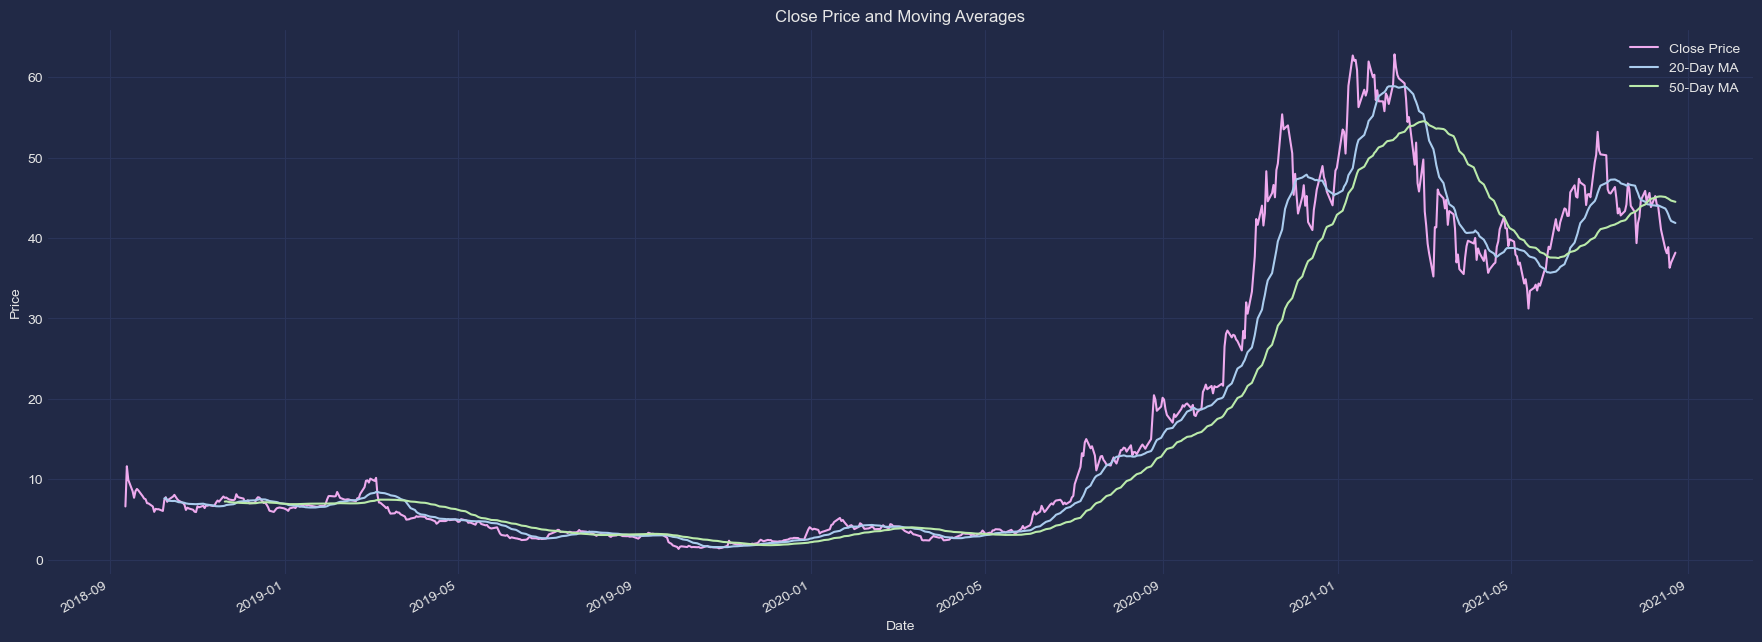

In [173]:
data['Close'].plot(label='Close Price', color='#eae')
data['MA20'].plot(label='20-Day MA', color='#ace')
data['MA50'].plot(label='50-Day MA', color='#baeaaa')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

- The price is generally going up over time.
- There are times when the price goes down a little before continuing to go up.
- The 20-day and 50-day moving averages are also going up, which suggests that the overall trend is positive.


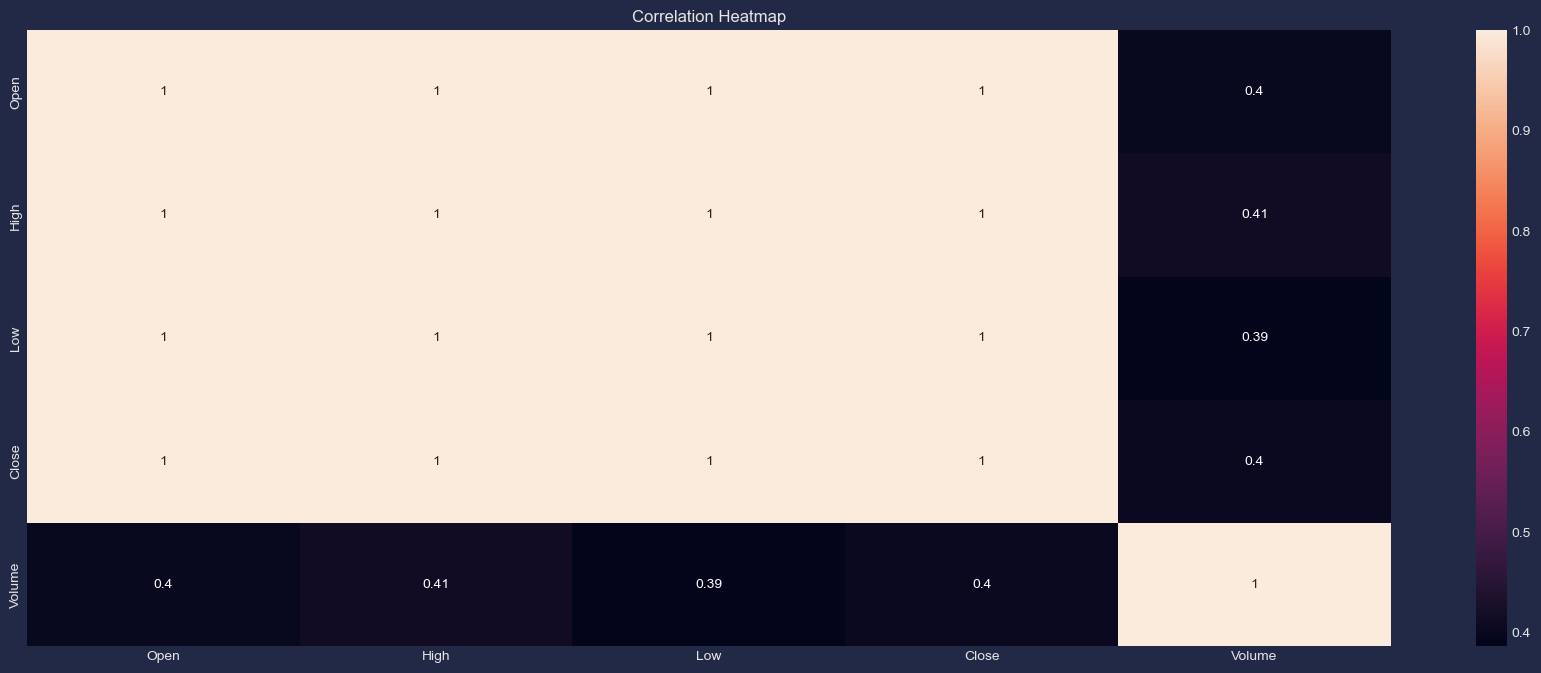

In [174]:
# Correlation Analysis
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

- Open, High, Low, Close are highly correlated.
- Volume has a very low correlation with the other variables.


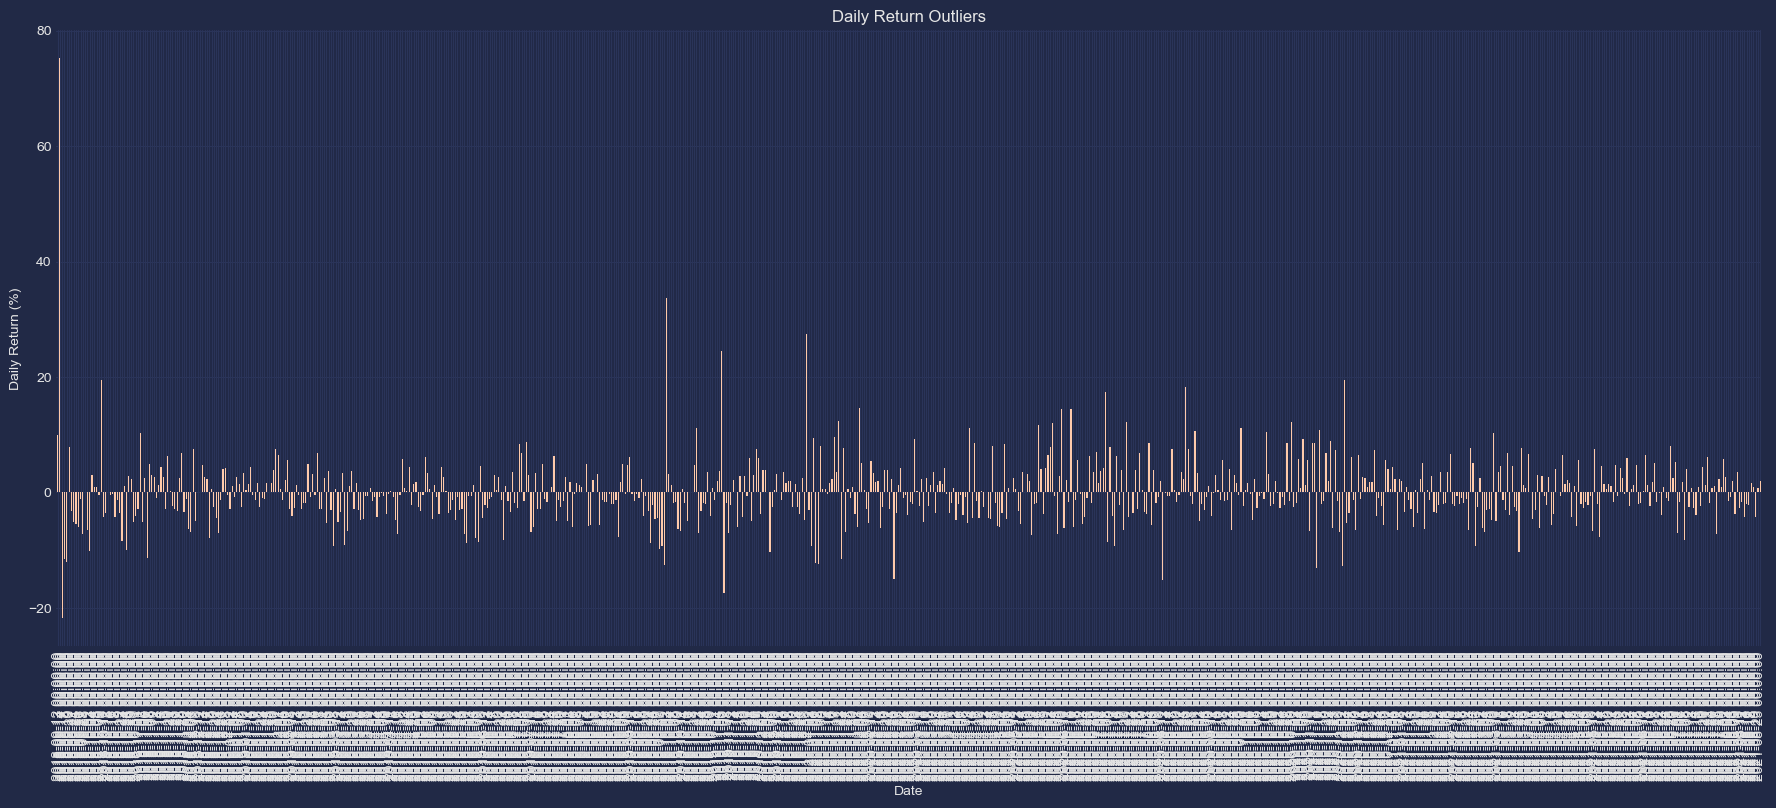

In [175]:
# Anomaly Detection: Daily Return Outliers
data['Daily_Return'].plot(kind='bar', color='#ffcaaa')
plt.title('Daily Return Outliers')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

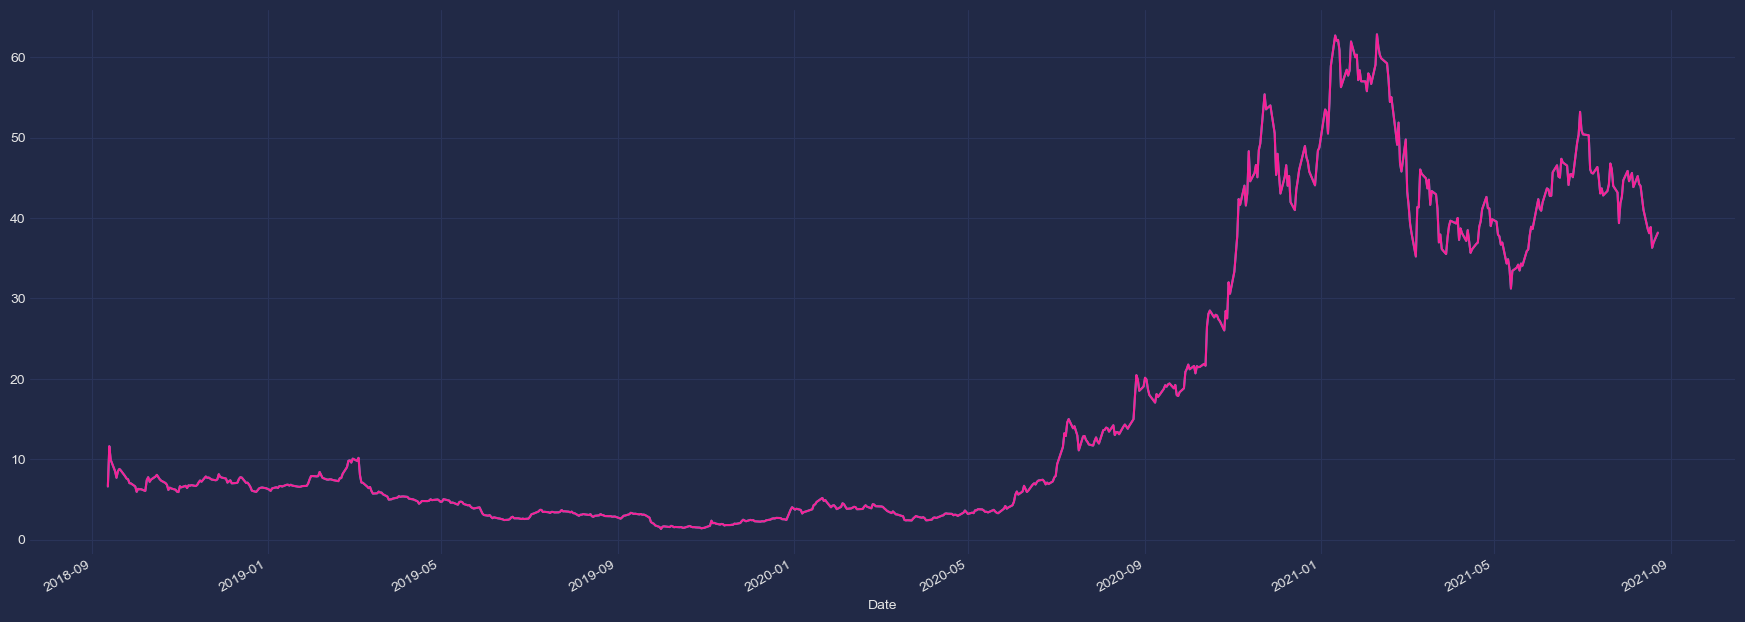

In [176]:
data['Adj Close'].plot()
data['Close'].plot()
plt.show()


In [177]:
# Seasonality and Trend Analysis: Resample Monthly and Yearly
monthly_data = data['Close'].resample('M').mean()
yearly_data = data['Close'].resample('Y').mean()

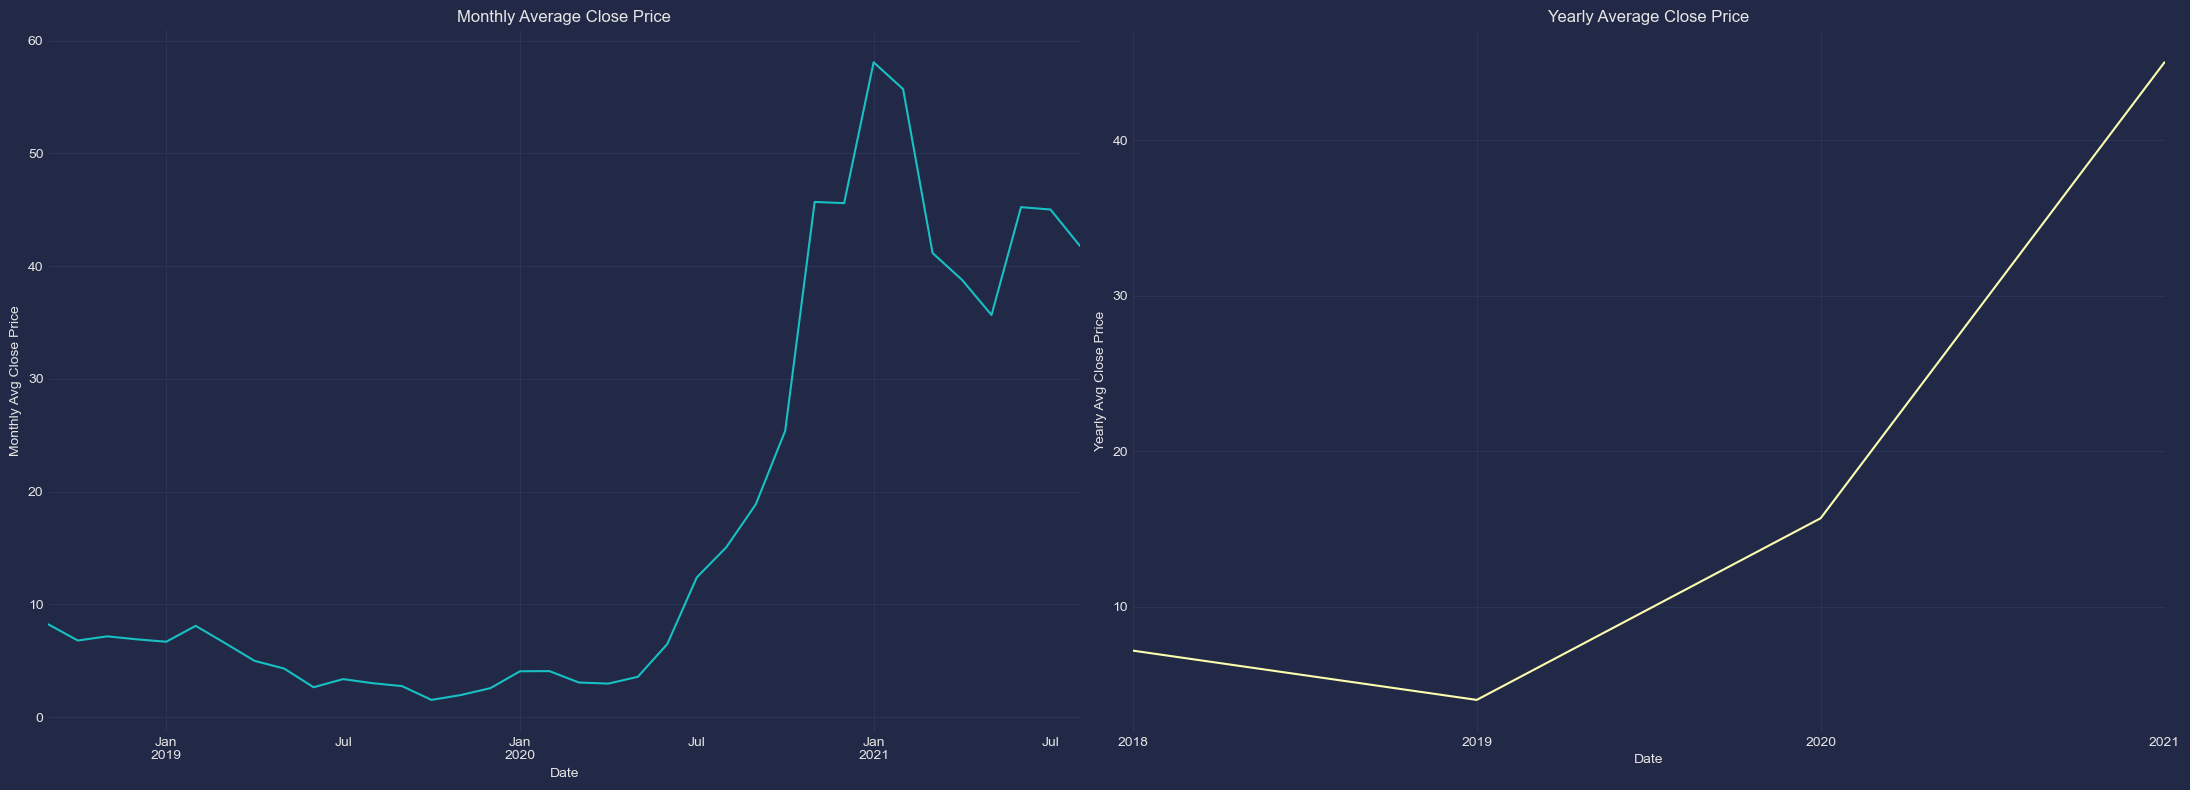

In [178]:
# Monthly Trend
plt.subplot(1, 2, 1)
monthly_data.plot(title='Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Monthly Avg Close Price')

# Yearly Trend
plt.subplot(1, 2, 2)
yearly_data.plot(title='Yearly Average Close Price', color='#fcffaf')
plt.xlabel('Date')
plt.ylabel('Yearly Avg Close Price')

plt.tight_layout()
plt.show()

The left chart shows the monthly average closing price of an asset over time. It has a general upward trend, with some fluctuations. The right chart shows the yearly average closing price of the same asset. It also shows an upward trend, but less volatile than the monthly chart.


In [179]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,High_Low_Spread,MA20,MA50
Date,,,,,,,,,,
2018-09-12,6.000000,6.930000,5.350000,6.600000,6.600000,66849000,10.000000,29.532710,NaN,NaN
2018-09-13,6.620000,12.690000,6.520000,11.600000,11.600000,158346500,75.226586,94.631902,NaN,NaN
2018-09-14,12.660000,13.800000,9.220000,9.900000,9.900000,172473600,-21.800948,49.674620,NaN,NaN
2018-09-17,9.610000,9.750000,8.500000,8.500000,8.500000,56323900,-11.550468,14.705882,NaN,NaN
2018-09-18,8.730000,9.100000,7.670000,7.680000,7.680000,41827600,-12.027491,18.644068,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-17,37.459999,39.020000,36.830002,38.099998,38.099998,60838000,1.708486,5.946234,43.3535,44.9880
2021-08-18,38.490002,39.630001,37.950001,38.860001,38.860001,48277600,0.961286,4.426877,42.9580,44.8940
2021-08-19,37.889999,38.150002,36.240002,36.290001,36.290001,56718000,-4.222745,5.270419,42.4690,44.7650


In [180]:
# Sorting DataFrame
data.sort_values(by='Date', ascending=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Daily_Return,High_Low_Spread,MA20,MA50
0,37.439999,38.380001,37.040001,38.169998,38.169998,1.949784,3.617710,41.8655,44.4980
1,36.630001,37.900002,36.599998,36.919998,36.919998,0.791693,3.551924,42.1155,44.6482
2,37.889999,38.150002,36.240002,36.290001,36.290001,-4.222745,5.270419,42.4690,44.7650
3,38.490002,39.630001,37.950001,38.860001,38.860001,0.961286,4.426877,42.9580,44.8940
4,37.459999,39.020000,36.830002,38.099998,38.099998,1.708486,5.946234,43.3535,44.9880
...,...,...,...,...,...,...,...,...,...
737,8.730000,9.100000,7.670000,7.680000,7.680000,-12.027491,18.644068,NaN,NaN
738,9.610000,9.750000,8.500000,8.500000,8.500000,-11.550468,14.705882,NaN,NaN
739,12.660000,13.800000,9.220000,9.900000,9.900000,-21.800948,49.674620,NaN,NaN
740,6.620000,12.690000,6.520000,11.600000,11.600000,75.226586,94.631902,NaN,NaN


## Model


In [181]:
data =data.dropna(subset=['Close'])

In [182]:
data

,Open,High,Low,Close,Adj Close,Daily_Return,High_Low_Spread,MA20,MA50
0,37.439999,38.380001,37.040001,38.169998,38.169998,1.949784,3.617710,41.8655,44.4980
1,36.630001,37.900002,36.599998,36.919998,36.919998,0.791693,3.551924,42.1155,44.6482
2,37.889999,38.150002,36.240002,36.290001,36.290001,-4.222745,5.270419,42.4690,44.7650
3,38.490002,39.630001,37.950001,38.860001,38.860001,0.961286,4.426877,42.9580,44.8940
4,37.459999,39.020000,36.830002,38.099998,38.099998,1.708486,5.946234,43.3535,44.9880
...,...,...,...,...,...,...,...,...,...
737,8.730000,9.100000,7.670000,7.680000,7.680000,-12.027491,18.644068,NaN,NaN
738,9.610000,9.750000,8.500000,8.500000,8.500000,-11.550468,14.705882,NaN,NaN
739,12.660000,13.800000,9.220000,9.900000,9.900000,-21.800948,49.674620,NaN,NaN
740,6.620000,12.690000,6.520000,11.600000,11.600000,75.226586,94.631902,NaN,NaN


In [183]:
data['Close'].isna().sum()

0

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             742 non-null    float64
 1   High             742 non-null    float64
 2   Low              742 non-null    float64
 3   Close            742 non-null    float64
 4   Adj Close        742 non-null    float64
 5   Daily_Return     742 non-null    float64
 6   High_Low_Spread  742 non-null    float64
 7   MA20             723 non-null    float64
 8   MA50             693 non-null    float64
dtypes: float64(9)
memory usage: 52.3 KB


In [185]:
data.index

RangeIndex(start=0, stop=742, step=1)

In [186]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

path = f'./Data/{company}/{company.lower()}.csv'
data = pd.read_csv(path)
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data =data.dropna(subset=['Close'])
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Splitting the data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Prepare sequences
sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)


In [187]:
class StockPriceLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=64, output_size=1):
        super(StockPriceLSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).requires_grad_()
        c_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).requires_grad_()
        
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        out, _ = self.lstm(x, (h_0.detach(), c_0.detach()))
        
        # Take the output from the last time step
        out = self.linear(out[:, -1, :])
        return out


In [188]:
import torch
import torch.nn as nn

class StockPriceLSTM2(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=64, output_size=1, num_layers=2, dropout=0.2):
        super(StockPriceLSTM2, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        
        # Define a multi-layer LSTM with dropout regularization
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers, 
                            dropout=dropout, batch_first=True)
        
        # Output layer to map LSTM output to desired output size
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states (num_layers, batch_size, hidden_layer_size)
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        
        # Forward pass through LSTM layers
        out, _ = self.lstm(x, (h_0, c_0))
        
        # Output from the last time step
        out = self.linear(out[:, -1, :])
        return out


In [189]:
# Model, Loss, and Optimizer
model = StockPriceLSTM2()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training Loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_batch)
        
        # Compute the loss
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/100, Loss: 0.0167
Epoch 2/100, Loss: 0.0229
Epoch 3/100, Loss: 0.0207
Epoch 4/100, Loss: 0.0095
Epoch 5/100, Loss: 0.0023
Epoch 6/100, Loss: 0.0008
Epoch 7/100, Loss: 0.0021
Epoch 8/100, Loss: 0.0012
Epoch 9/100, Loss: 0.0006
Epoch 10/100, Loss: 0.0032
Epoch 11/100, Loss: 0.0012
Epoch 12/100, Loss: 0.0005
Epoch 13/100, Loss: 0.0019
Epoch 14/100, Loss: 0.0004
Epoch 15/100, Loss: 0.0013
Epoch 16/100, Loss: 0.0021
Epoch 17/100, Loss: 0.0023
Epoch 18/100, Loss: 0.0011
Epoch 19/100, Loss: 0.0004
Epoch 20/100, Loss: 0.0034
Epoch 21/100, Loss: 0.0003
Epoch 22/100, Loss: 0.0007
Epoch 23/100, Loss: 0.0004
Epoch 24/100, Loss: 0.0004
Epoch 25/100, Loss: 0.0009
Epoch 26/100, Loss: 0.0012
Epoch 27/100, Loss: 0.0007
Epoch 28/100, Loss: 0.0023
Epoch 29/100, Loss: 0.0004
Epoch 30/100, Loss: 0.0010
Epoch 31/100, Loss: 0.0005
Epoch 32/100, Loss: 0.0009
Epoch 33/100, Loss: 0.0016
Epoch 34/100, Loss: 0.0012
Epoch 35/100, Loss: 0.0011
Epoch 36/100, Loss: 0.0015
Epoch 37/100, Loss: 0.0012
Epoch 38/1

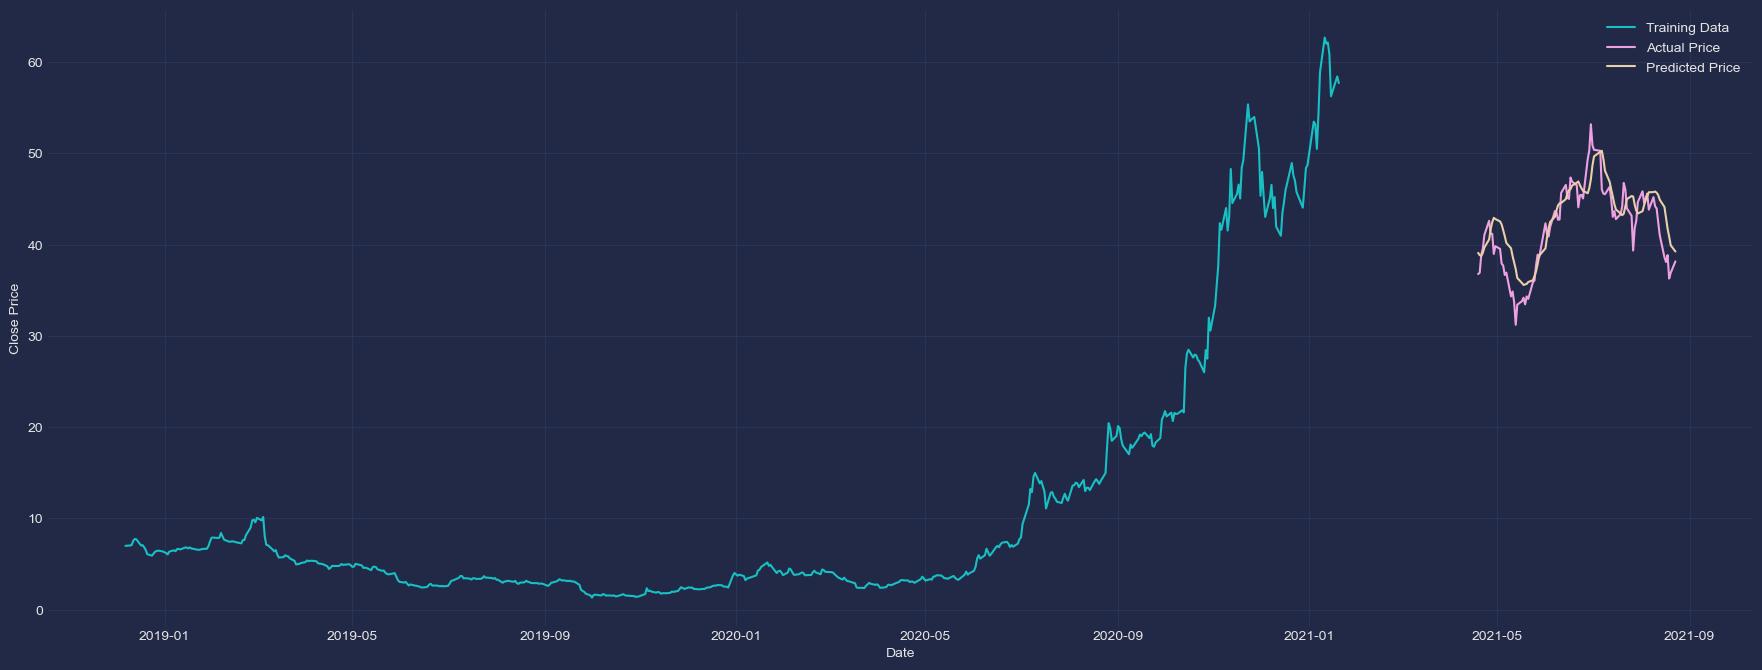

In [190]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    predictions = model(X_test).detach().numpy()

# Rescale predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.unsqueeze(1).numpy())

# Ensure predictions and test data index match
train_plot_index = data.index[sequence_length:train_size]
test_plot_index = data.index[train_size + sequence_length:]

# Plot training data
plt.plot(train_plot_index, scaler.inverse_transform(train_data)[sequence_length:], label='Training Data')

# Plot actual prices
plt.plot(test_plot_index, y_test_rescaled, label='Actual Price',color='#faee')

# Plot predicted prices
plt.plot(test_plot_index, predictions, label='Predicted Price',color='#eacfaa')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [191]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_rescaled, predictions)
print(f"R-squared (R²): {r2:.4f}")


R-squared (R²): 0.6958


In [192]:
import torch

model_path = 'tesla_stock_model.pth'
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to tesla_stock_model.pth


In [193]:
model = StockPriceLSTM2()

model.load_state_dict(torch.load(model_path))

model.eval()

print(f"Model loaded from {model_path}")


Model loaded from tesla_stock_model.pth


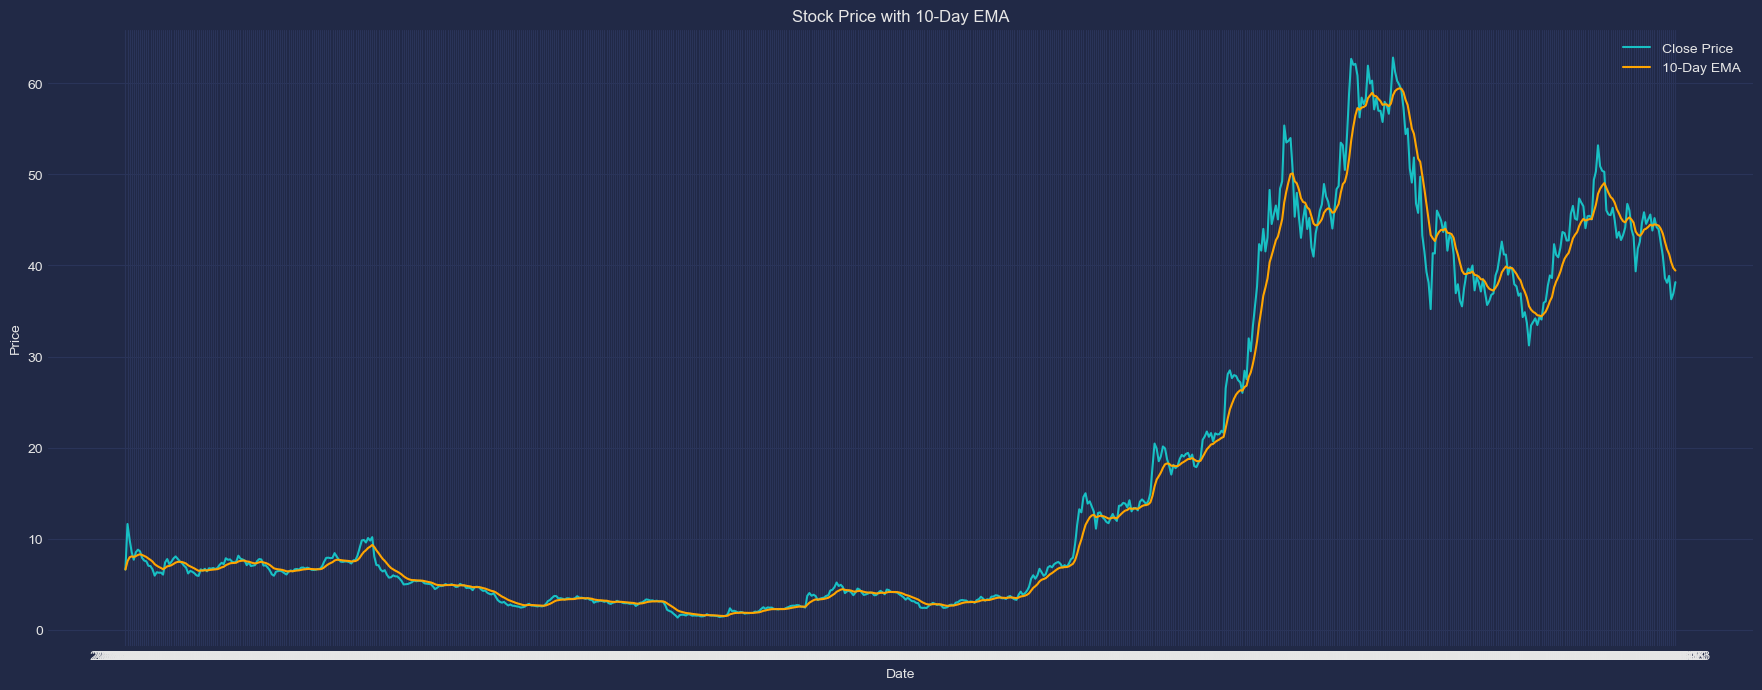

In [194]:
import pandas as pd

def calculate_ema(data, window):
    """
    Calculate Exponential Moving Average (EMA) for a given time series.
    
    Parameters:
        data (pd.Series): The time series data (e.g., stock prices).
        window (int): The period over which to apply the EMA.
    
    Returns:
        pd.Series: The EMA values.
    """
    return data.ewm(span=window, adjust=False).mean()
path = f'./Data/{company}/{company.lower()}.csv'
data = pd.read_csv(path)
data.head()    

# Load your stock data (assuming 'data' contains 'Close' prices)
window = 10  # Example for a 10-day EMA
data['EMA_10'] = calculate_ema(data['Close'], window)

# Plot original Close price and EMA
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['EMA_10'], label='10-Day EMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Price with 10-Day EMA')
plt.show()


In [195]:
# Drop any rows with NaN values caused by EMA calculation at the start
data.dropna(inplace=True)

In [196]:
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'EMA_10']]
data.set_index('Date', inplace=True)


# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Splitting the data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


# Prepare sequences
sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)

In [197]:
# Model_2, Loss, and Optimizer
model_2 = StockPriceLSTM2()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model_2.parameters(), lr=0.001)

# Training Loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        model_2.train()
        optimizer.zero_grad()
        y_pred = model_2(X_batch)
        
        # Compute the loss
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/100, Loss: 0.0362
Epoch 2/100, Loss: 0.0294
Epoch 3/100, Loss: 0.0230
Epoch 4/100, Loss: 0.0066
Epoch 5/100, Loss: 0.0019
Epoch 6/100, Loss: 0.0036
Epoch 7/100, Loss: 0.0013
Epoch 8/100, Loss: 0.0016
Epoch 9/100, Loss: 0.0004
Epoch 10/100, Loss: 0.0015
Epoch 11/100, Loss: 0.0004
Epoch 12/100, Loss: 0.0005
Epoch 13/100, Loss: 0.0004
Epoch 14/100, Loss: 0.0008
Epoch 15/100, Loss: 0.0006
Epoch 16/100, Loss: 0.0003
Epoch 17/100, Loss: 0.0014
Epoch 18/100, Loss: 0.0007
Epoch 19/100, Loss: 0.0005
Epoch 20/100, Loss: 0.0012
Epoch 21/100, Loss: 0.0006
Epoch 22/100, Loss: 0.0002
Epoch 23/100, Loss: 0.0004
Epoch 24/100, Loss: 0.0011
Epoch 25/100, Loss: 0.0008
Epoch 26/100, Loss: 0.0004
Epoch 27/100, Loss: 0.0009
Epoch 28/100, Loss: 0.0013
Epoch 29/100, Loss: 0.0005
Epoch 30/100, Loss: 0.0002
Epoch 31/100, Loss: 0.0006
Epoch 32/100, Loss: 0.0002
Epoch 33/100, Loss: 0.0010
Epoch 34/100, Loss: 0.0001
Epoch 35/100, Loss: 0.0001
Epoch 36/100, Loss: 0.0013
Epoch 37/100, Loss: 0.0003
Epoch 38/1

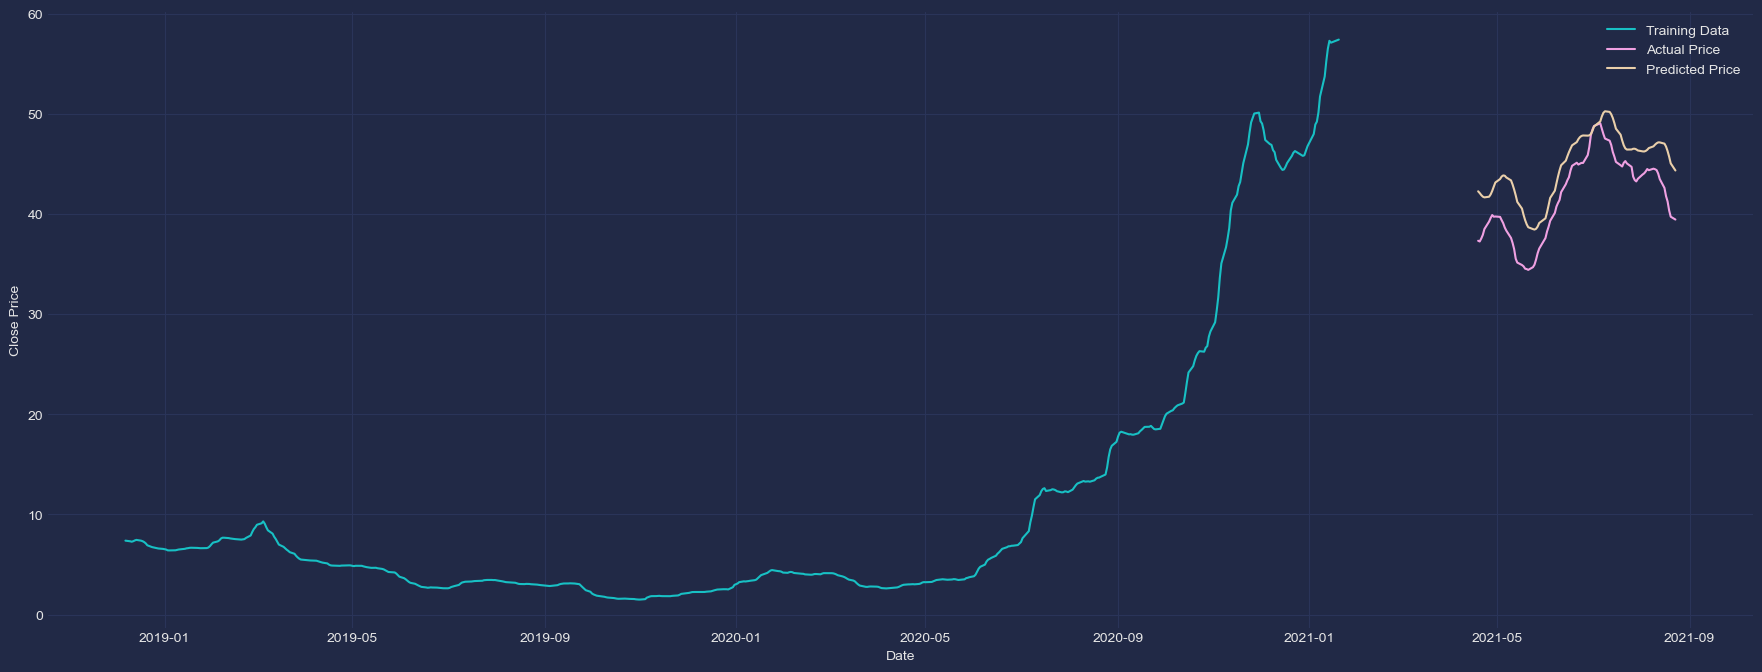

In [198]:
# Evaluate on test data
model_2.eval()
with torch.no_grad():
    predictions = model_2(X_test).detach().numpy()

# Rescale predictions back to original scale
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.unsqueeze(1).numpy())

# Ensure predictions and test data index match
train_plot_index = data.index[sequence_length:train_size]
test_plot_index = data.index[train_size + sequence_length:]

# Plot training data
plt.plot(train_plot_index, scaler.inverse_transform(train_data)[sequence_length:], label='Training Data')

# Plot actual prices
plt.plot(test_plot_index, y_test_rescaled, label='Actual Price',color='#faee')

# Plot predicted prices
plt.plot(test_plot_index, predictions, label='Predicted Price',color='#eacfaa')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [199]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_rescaled, predictions)
print(f"R-squared (R²): {r2:.4f}")


R-squared (R²): 0.2867
